**Problem Statement**<br/>
hiring.csv contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score<br/>

#### Solution

In [20]:
# Import the necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import linear_model

In [2]:
# Load the data 
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [25]:
# Handle the missing data
df.replace({
    'experience' : { np.nan : 'zero'},
    'test_score(out of 10)' : {np.nan : df['test_score(out of 10)'].mean()}
},inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [26]:
# convert ordinal data ( here experience) to numbers
experiences = {
    'zero':0,
    'five':5,
    'two':2,
    'seven':7,
    'three':3,
    'ten':10, 
    'eleven':11
}

df.experience = df.experience.map(experiences)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


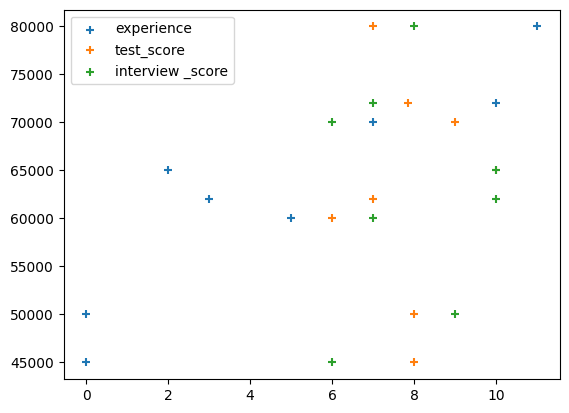

In [41]:
# Plot the graph

plt.scatter(df.experience,df['salary($)'],marker='+',label='experience')
plt.scatter(df['test_score(out of 10)'],df['salary($)'],marker='+',label='test_score')
plt.scatter(df['interview_score(out of 10)'],df['salary($)'],marker='+',label='interview _score')

plt.legend()
plt.show()


In [54]:
# Train the model
X = df.drop(df[['salary($)']],axis='columns')
y = df['salary($)']
model = linear_model.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9639958361860579

In [51]:
# Prediction
print(f'salary of a candidate with 2 yr experience, 9 test score, 6 interview score is {model.predict([[2,9,6]])}')
print(f'salary of a candidate with 12 yr experience, 10 test score, 10 interview score is {model.predict([[12,10,10]])}')


salary of a candidate with 2 yr experience, 9 test score, 6 interview score is [53290.89255945]
salary of a candidate with 12 yr experience, 10 test score, 10 interview score is [92268.07227784]


C:\Users\jalee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\jalee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
# Verification 
  # salary = m1*experience + m2*test_score + m3*interview_score + c 

m1,m2,m3 = model.coef_
c = model.intercept_

experience = 2
test_score = 9
interview_score = 6

print(f'salary of a candidate with 2 yr experience, 9 test score, 6 interview score is {m1*experience + m2*test_score + m3*interview_score + c}')

salary of a candidate with 2 yr experience, 9 test score, 6 interview score is 53290.892559447646
